# 6.4 Supervised Machine Learning - Regression

## 1. Import libraries and data sets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'C:\Users\julia\anaconda3\Mental Health Service Ability vs Suicides'

In [4]:
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'mh_s_combined.pkl'))

## 2. Graph recognition

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

## 3. Data Cleaning

In [5]:
df_merge.columns

Index(['Id', 'Title Code', 'Title', 'Country', 'Year_x', 'Value_x',
       'Data Collection Date_x', 'Title Code Suicide', 'Suicide rates',
       'Location', 'Year_y', 'Gender', 'Value_y', 'Data Collection Date_y',
       '_merge'],
      dtype='object')

In [6]:
df_merge.head()

,Id,Title Code,Title,Country,Year_x,Value_x,Data Collection Date_x,Title Code Suicide,Suicide rates,Location,Year_y,Gender,Value_y,Data Collection Date_y,_merge
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Female,5.67,2021-02-08T23:00:00.000Z,both
1,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Both sexes,5.96,2021-02-08T23:00:00.000Z,both
2,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Male,6.19,2021-02-08T23:00:00.000Z,both
3,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2018,Female,5.57,2021-02-08T23:00:00.000Z,both
4,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2018,Both sexes,5.91,2021-02-08T23:00:00.000Z,both


In [7]:
df_merge.shape

(97320, 15)

In [9]:
# Renaming columns to better understand them in correlation
df_merge.rename(columns = {'Year_x' : 'Year of MH Services', 'Value_x' : 'Count of MH Services', 'Year_y' : 'Year of Suicide', 'Value_y' : 'Count of Suicides',}, inplace = True)

In [11]:
#Check for missing values
df_merge.isnull().sum()

Id                        0
Title Code                0
Title                     0
Country                   0
Year of MH Services       0
Count of MH Services      0
Data Collection Date_x    0
Title Code Suicide        0
Suicide rates             0
Location                  0
Year of Suicide           0
Gender                    0
Count of Suicides         0
Data Collection Date_y    0
_merge                    0
dtype: int64

No missing values

In [12]:
#Check for duplucates
dups = df_merge.duplicated()

In [13]:
dups.shape

(97320,)

No duplicates

C:\Users\julia\AppData\Local\Temp\ipykernel_24912\3115403398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merge['Count of Suicides'], bins=25)
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count of Suicides', ylabel='Density'>

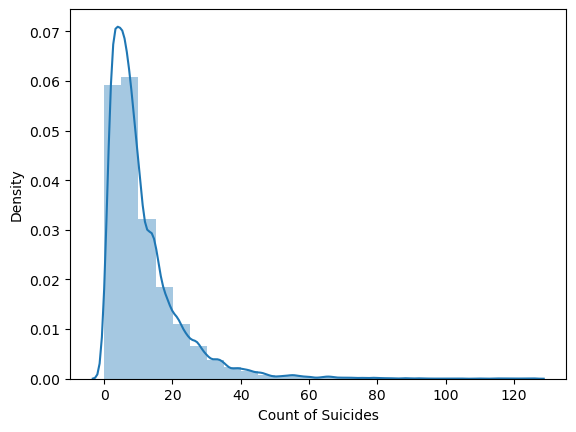

In [16]:
# Check for extreme values
sns.distplot(df_merge['Count of Suicides'], bins=25)

## 4. Create a scatterplot

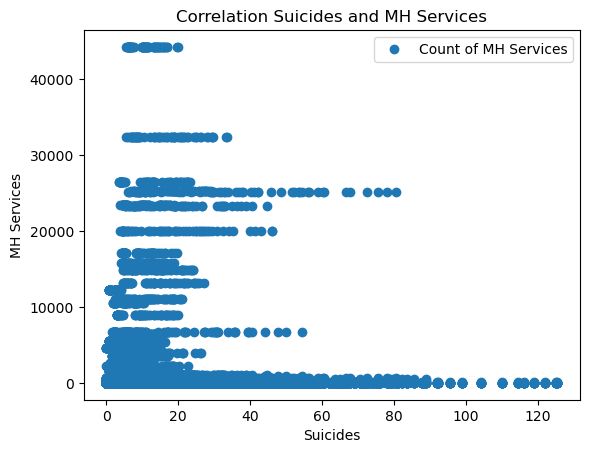

In [17]:
df_merge.plot(x = 'Count of Suicides', y='Count of MH Services',style='o')
plt.title('Correlation Suicides and MH Services')  
plt.xlabel('Suicides')  
plt.ylabel('MH Services')  
plt.show()

## 5. Hypothesis

Hypothesis: The more Mental Health Services are available, the less suicides there are.

## 6. Reshaping the variables into NumPy arrays

In [18]:
X = df_merge['Count of Suicides'].values.reshape(-1,1)
y = df_merge['Count of MH Services'].values.reshape(-1,1)

In [20]:
X

array([[ 5.67],
       [ 5.96],
       [ 6.19],
       ...,
       [ 1.65],
       [11.32],
       [ 6.35]])

In [22]:
y

array([[0.231],
       [0.231],
       [0.231],
       ...,
       [0.   ],
       [0.   ],
       [0.   ]])

## 7. Split data into a training set and a test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Regression analysis

In [24]:
# Create a regression object
regression = LinearRegression()

In [25]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

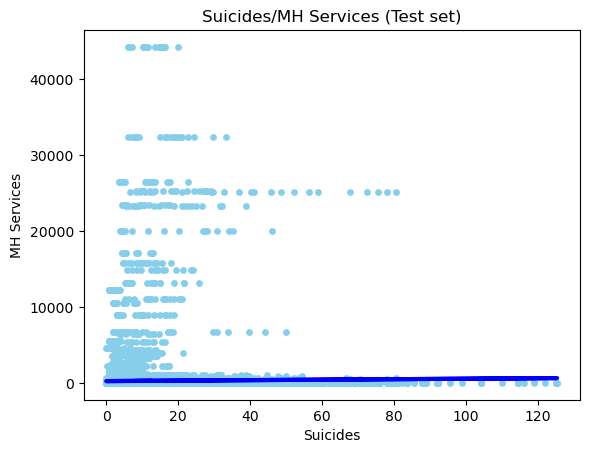

In [31]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='skyblue', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Suicides/MH Services (Test set)')
plot_test.xlabel('Suicides')
plot_test.ylabel('MH Services')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [33]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.12693757]]
Mean squared error:  5214380.963994421
R2 score:  0.000648303595659816


In [34]:
y_predicted

array([[277.82835506],
       [249.02926001],
       [256.87787332],
       ...,
       [286.11473962],
       [257.87849334],
       [266.6964573 ]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,41.856,277.828355
1,2.821,249.029260
2,0.136,256.877873
3,103.608,257.315645
4,46.484,323.575452
5,0.011,272.793986
6,0.444,266.258686
7,3.568,258.410073
8,0.239,249.341954
9,0.000,275.639499


In [37]:
# Predict
y_predicted_train = regression.predict(X_train)

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.12693757]]
Mean squared error:  4888377.312087261
R2 score:  0.0002413962057945529


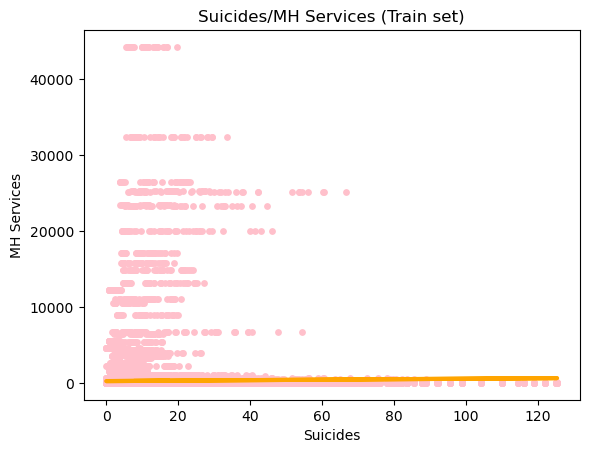

In [41]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='pink', s = 15)
plot_test.plot(X_train, y_predicted_train, color='orange', linewidth =3)
plot_test.title('Suicides/MH Services (Train set)')
plot_test.xlabel('Suicides')
plot_test.ylabel('MH Services')
plot_test.show()

The test set visualization is the same as the train set. Also, the predicted values are far higher than the actual ones. I'm not sure, what exactly this tells me.